In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import os
import sys
import cv2

In [6]:
# DB connection info
import psycopg2
from my_secrets import DB_HOST_NAME, DB_USER_NAME, DB_PASSWORD, DB_NAME

# connection info
host = DB_HOST_NAME
user = DB_USER_NAME
password = DB_PASSWORD
database = DB_NAME

# conn
connection = psycopg2.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

cursor = connection.cursor()

In [44]:
# # backup and rename columns because i messed up
# col_names = 'nose, left eye, right eye, left ear, right ear, left shoulder, right shoulder, left elbow, right elbow, left wrist, right wrist, left hip, right hip, left knee, right knee, left ankle, right ankle'
# col_names = col_names.split(sep=', ') # list has original col names
# col_names = [i.replace(' ', '_') for i in col_names] # underscore for blank
# col_names = [col+i for col in col_names for i in ('_y', '_x')] + ['posture', 'location'] # y,x coords for each col. tf lists y coords first
# col_names_and_types = [i + ' FLOAT,' for i in col_names[:-2]] + [col_names[-2]+' VARCHAR(20),',  col_names[-1]+' VARCHAR(1000)'] # sql FLOAT for all cols. posture at the end
# cols_string = '\n    '.join(col_names_and_types)
# col_count_ex_id = len(col_names_and_types)

# # create table
# sql_create_table = f'''
# CREATE TABLE IF NOT EXISTS movenet_output_backup (
#     Id SERIAL PRIMARY KEY,
#     {cols_string} 
# )
# '''
# cursor.execute(sql_create_table)

In [45]:
# connection.commit()

In [88]:
# only_xy = new_columns[1:-2]
# new_new_columns = [i for pair in zip(only_xy[:17], only_xy[17:]) for i in pair] + new_columns[-2:]
# sql_new_insert = f'''
# INSERT INTO movenet_output_backup ({', '.join(new_new_columns)}) VALUES {str((r'%s',)*36)}
# '''.replace("'", '')
# print(new_new_columns)

['nose_y', 'right_elbow_x', 'nose_x', 'left_wrist_y', 'left_eye_y', 'left_wrist_x', 'left_eye_x', 'right_wrist_y', 'right_eye_y', 'right_wrist_x', 'right_eye_x', 'left_hip_y', 'left_ear_y', 'left_hip_x', 'left_ear_x', 'right_hip_y', 'right_ear_y', 'right_hip_x', 'right_ear_x', 'left_knee_y', 'left_shoulder_y', 'left_knee_x', 'left_shoulder_x', 'right_knee_y', 'right_shoulder_y', 'right_knee_x', 'right_shoulder_x', 'left_ankle_y', 'left_elbow_y', 'left_ankle_x', 'left_elbow_x', 'right_ankle_y', 'right_elbow_y', 'right_ankle_x', 'posture', 'location']


In [89]:
# print(sql_new_insert)


INSERT INTO movenet_output_backup (nose_y, right_elbow_x, nose_x, left_wrist_y, left_eye_y, left_wrist_x, left_eye_x, right_wrist_y, right_eye_y, right_wrist_x, right_eye_x, left_hip_y, left_ear_y, left_hip_x, left_ear_x, right_hip_y, right_ear_y, right_hip_x, right_ear_x, left_knee_y, left_shoulder_y, left_knee_x, left_shoulder_x, right_knee_y, right_shoulder_y, right_knee_x, right_shoulder_x, left_ankle_y, left_elbow_y, left_ankle_x, left_elbow_x, right_ankle_y, right_elbow_y, right_ankle_x, posture, location) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)



In [69]:
# cursor.execute('SELECT * FROM movenet_output')
# backup_data = cursor.fetchall()
# backup_data

[(1,
  0.184862330555916,
  0.155118674039841,
  0.159506514668465,
  0.125211328268051,
  0.112798780202866,
  0.327313929796219,
  0.301196873188019,
  0.804482042789459,
  0.719603598117828,
  0.898780047893524,
  0.86021214723587,
  0.88902872800827,
  0.845838129520416,
  0.964114487171173,
  0.922905683517456,
  0.975468933582306,
  0.955367684364319,
  0.283286601305008,
  0.289638012647629,
  0.288565009832382,
  0.39657735824585,
  0.382961839437485,
  0.513299465179443,
  0.513803362846375,
  0.441190868616104,
  0.457388192415237,
  0.211495488882065,
  0.222744703292847,
  0.784423649311066,
  0.708397507667542,
  0.460858404636383,
  0.278325289487839,
  0.524913966655731,
  0.304973393678665,
  'normal',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSjfxEwjmB4gPJsok7e3Amm3CXHnEqXgU4kfw&usqp=CAU'),
 (2,
  0.14821831882,
  0.116184987127781,
  0.119817718863487,
  0.130199521780014,
  0.13097670674324,
  0.315744161605835,
  0.30867725610733,
  0.60472160577774,


In [98]:
# cursor.execute(sql_new_insert, backup_data[0][1:])

In [99]:
# cursor.executemany(sql_new_insert, [i[1:] for i in backup_data])
# connection.commit()

In [100]:
# connection.close()

In [3]:
# fetch columns
sql_fetch_columns = '''
SELECT column_name
FROM information_schema.columns
WHERE table_name = 'movenet_output';
'''
cursor.execute(sql_fetch_columns)
columns = cursor.fetchall()
print(columns)

[('id',), ('nose_y',), ('nose_x',), ('left_eye_y',), ('left_eye_x',), ('right_eye_y',), ('right_eye_x',), ('left_ear_y',), ('left_ear_x',), ('right_ear_y',), ('right_ear_x',), ('left_shoulder_y',), ('left_shoulder_x',), ('right_shoulder_y',), ('right_shoulder_x',), ('left_elbow_y',), ('left_elbow_x',), ('right_elbow_y',), ('right_elbow_x',), ('left_wrist_y',), ('left_wrist_x',), ('right_wrist_y',), ('right_wrist_x',), ('left_hip_y',), ('left_hip_x',), ('right_hip_y',), ('right_hip_x',), ('left_knee_y',), ('left_knee_x',), ('right_knee_y',), ('right_knee_x',), ('left_ankle_y',), ('left_ankle_x',), ('right_ankle_y',), ('right_ankle_x',), ('posture',), ('location',)]


In [7]:
# fetch data
# columns = [i[0] for i in columns]
# cursor.execute('SELECT * FROM movenet_output')
# df = pd.DataFrame(cursor.fetchall(), columns=columns)
# df.head()
new_columns = [i[0] for i in columns]
cursor.execute("SELECT * FROM movenet_output")
df = pd.DataFrame(cursor.fetchall(), columns=new_columns)
df.head()

,id,nose_y,nose_x,left_eye_y,left_eye_x,right_eye_y,right_eye_x,left_ear_y,left_ear_x,right_ear_y,...,left_knee_y,left_knee_x,right_knee_y,right_knee_x,left_ankle_y,left_ankle_x,right_ankle_y,right_ankle_x,posture,location
0,1,0.309498,0.417565,0.263321,0.467690,0.252194,0.363273,0.344777,0.521531,0.332646,...,0.831342,0.673023,0.813650,0.135513,0.042986,0.437581,0.820338,0.060243,normal,stream
1,2,0.299186,0.399762,0.244755,0.448422,0.242650,0.339140,0.345823,0.502389,0.357247,...,0.863511,0.683003,0.863938,0.148209,0.053974,0.433547,0.760555,0.031097,normal,stream
2,3,0.300609,0.399306,0.245457,0.448668,0.242364,0.339609,0.344168,0.503035,0.346211,...,0.860347,0.664847,0.844408,0.146251,0.045420,0.439442,0.777346,0.036600,normal,stream
3,4,0.286601,0.400168,0.238530,0.449117,0.235822,0.342184,0.341093,0.505386,0.344459,...,0.843940,0.663646,0.824511,0.151428,0.048023,0.435393,0.745909,0.055730,normal,stream
4,5,0.276875,0.398467,0.223506,0.447963,0.224328,0.344220,0.335469,0.509618,0.341892,...,0.854366,0.667483,0.827760,0.044011,0.054135,0.436625,0.750388,0.058055,normal,stream


In [8]:
cursor.close()
connection.close()

In [9]:
# split data
X = df.iloc[:,1:].select_dtypes('number')
y = df['posture'].copy()

class_names = y.unique()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train)
X_train.shape, X_val.shape, X_test.shape

((1372, 34), (458, 34), (610, 34))

In [10]:
encode_target_dict = {k:v for k, v in zip(sorted(class_names), range(len(class_names)))}
encode_target_dict

{'forward_head': 0, 'leaning': 1, 'normal': 2}

In [11]:
y_train = y_train.map(encode_target_dict)
y_val = y_val.map(encode_target_dict)
y_test = y_test.map(encode_target_dict)

In [12]:
# 분류 모델 생성
inputs = tf.keras.Input(shape=(34))

layer = keras.layers.Dense(128, activation=tf.nn.relu6)(inputs)
layer = keras.layers.Dropout(0.5)(layer)
layer = keras.layers.Dense(64, activation=tf.nn.relu6)(layer)
layer = keras.layers.Dropout(0.5)(layer)
outputs = keras.layers.Dense(len(class_names), activation="softmax")(layer)

model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34)]              0         
                                                                 
 dense (Dense)               (None, 128)               4480      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 12,931
Trainable params: 12,931
Non-trainable p

In [13]:
# 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Add a checkpoint callback to store the checkpoint that has the highest
# validation accuracy.
checkpoint_path = "weights.best.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
earlystopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                              patience=20)

In [14]:
# 실행
history = model.fit(X_train, y_train,
                    epochs=200,
                    batch_size=16,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint, earlystopping])

Epoch 1/200
53/86 [=================>............] - ETA: 0s - loss: 1.1253 - accuracy: 0.3502 
Epoch 1: val_accuracy improved from -inf to 0.49563, saving model to weights.best.hdf5
86/86 [==============================] - 1s 3ms/step - loss: 1.1170 - accuracy: 0.3579 - val_loss: 1.0665 - val_accuracy: 0.4956
Epoch 2/200
53/86 [=================>............] - ETA: 0s - loss: 1.0690 - accuracy: 0.4068
Epoch 2: val_accuracy improved from 0.49563 to 0.57860, saving model to weights.best.hdf5
86/86 [==============================] - 0s 2ms/step - loss: 1.0627 - accuracy: 0.4264 - val_loss: 1.0289 - val_accuracy: 0.5786
Epoch 3/200
50/86 [================>.............] - ETA: 0s - loss: 1.0234 - accuracy: 0.4975
Epoch 3: val_accuracy improved from 0.57860 to 0.60044, saving model to weights.best.hdf5
86/86 [==============================] - 0s 2ms/step - loss: 1.0190 - accuracy: 0.4934 - val_loss: 0.9652 - val_accuracy: 0.6004
Epoch 4/200
55/86 [==================>...........] - ETA: 0s

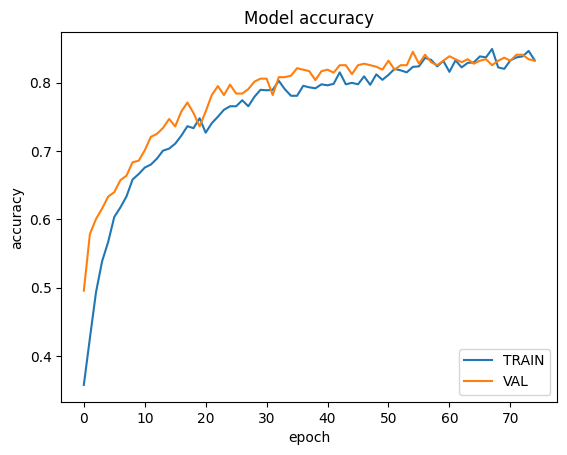

In [15]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['TRAIN', 'VAL'], loc='lower right')
plt.show()

In [16]:
# Evaluate the model using the TEST dataset
model.load_weights(checkpoint_path)
loss, accuracy = model.evaluate(X_test, y_test)

20/20 [==============================] - 0s 817us/step - loss: 0.4902 - accuracy: 0.8098


20/20 [==============================] - 0s 553us/step
Confusion matrix, without normalization

Classification Report:
               precision    recall  f1-score   support

forward_head       0.85      0.80      0.83       189
     leaning       0.76      0.84      0.80       215
      normal       0.83      0.79      0.81       206

    accuracy                           0.81       610
   macro avg       0.81      0.81      0.81       610
weighted avg       0.81      0.81      0.81       610



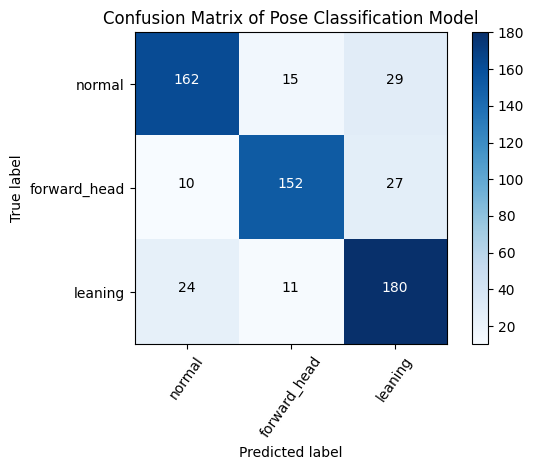

In [17]:
import itertools

# cm
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """Plots the confusion matrix."""
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=55)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

# Classify pose in the TEST dataset using the trained model
y_pred = model.predict(X_test)

# Convert the prediction result to class name
y_pred_label = [class_names[i] for i in np.argmax(y_pred, axis=1)]
y_true_label = [class_names[i] for i in y_test]

# Plot the confusion matrix
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
plot_confusion_matrix(cm,
                      class_names,
                      title ='Confusion Matrix of Pose Classification Model')

# Print the classification report
print('\nClassification Report:\n', classification_report(y_true_label,
                                                          y_pred_label))

In [187]:
import pickle

with open('my_model.pkl', 'wb') as file:
    pickle.dump(model, file)